Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [2]:
from __future__ import print_function, division

import thinkstats2
import thinkplot

import first
import hypothesis

%matplotlib inline

Read the data:

In [3]:
live, firsts, others = first.MakeFrames()

This is a copy of the class defined in `hypothesis.py`:

In [4]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

Compute the p-value of the difference in weights between first babies and others:

In [5]:
    data = (firsts.totalwgt_lb.dropna().values,
            others.totalwgt_lb.dropna().values)
    ht = hypothesis.DiffMeansPermute(data)
    p_value = ht.PValue(iters=10000)
    print('\nmeans permute birthweight')
    print('p-value =', p_value)
    print('actual =', ht.actual)
    print('ts max =', ht.MaxTestStat())


means permute birthweight
p-value = 0.0
actual = 0.124761184535
ts max = 0.123681596949


Plot the CDF of the test statistic under the null hypothesis:

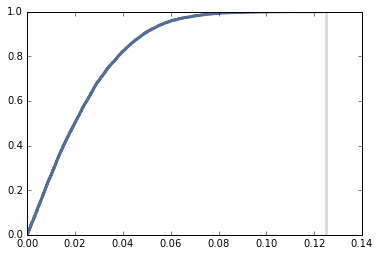

In [6]:
    ht.PlotCdf()

## Ex 9.1

In [13]:
import numpy as np
f, o = data
print(len(f), len(o))
sample_sizes = [10, 50, 100, 500, 1000]
for sample_size in sample_sizes:
    f_sample = np.random.choice(f, sample_size, replace=False)
    o_sample = np.random.choice(o, sample_size, replace=False)
    
    ht = hypothesis.DiffMeansPermute((f_sample, o_sample))
    p_value = ht.PValue(iters=10000)
    print('\nmeans permute birthweight')
    print('sample size =', sample_size)
    print('p-value =', p_value)
    print('actual =', ht.actual)
    print('ts max =', ht.MaxTestStat())
    

4363 4675

means permute birthweight
sample size = 10
p-value = 0.6641
actual = 0.18125
ts max = 1.34375

means permute birthweight
sample size = 50
p-value = 0.5641
actual = 0.13875
ts max = 1.07625

means permute birthweight
sample size = 100
p-value = 0.1073
actual = 0.33
ts max = 0.8

means permute birthweight
sample size = 500
p-value = 0.0475
actual = 0.167625
ts max = 0.290125

means permute birthweight
sample size = 1000
p-value = 0.0097
actual = 0.1679375
ts max = 0.2310625


There's definitely some variability, but overall there's a clear decrease in p-value as the sample sizes get bigger. Looks like you've gotta get into the $sample_size = 1000$ neighborhood to reliably have $p < 1$

Exercise 9.2: In Section 9.3, we simulated the null hypothesis by permutation; that is, we treated the observed values as if they represented the entire population, and randomly assigned the members of the population to the two groups.

An alternative is to use the sample to estimate the distribution for the population, then draw a random sample from that distribution. This process is called resampling. There are several ways to implement resampling, but one of the simplest is to draw a sample with replacement from the observed values, as in Section 9.10.

Write a class named `DiffMeansResample` that inherits from `DiffMeansPermute` and overrides `RunModel` to implement resampling, rather than permutation.

Use this model to test the differences in pregnancy length and birth weight. How much does the model affect the results?

In [21]:
class DiffMeansResample(DiffMeansPermute):
    def RunModel(self):
        g1 = np.random.choice(self.pool, self.n, replace=True)
        g2 = np.random.choice(self.pool, self.m, replace=True)
        data = g1, g2
        return data

Here's some code to test your implementation of `DiffMeansResample`.

In [ ]:
    data = firsts.prglngth.values, others.prglngth.values
    ht = DiffMeansResample(data)
    p_value = ht.PValue(iters=10000)
    print('\nmeans resample preglength')
    print('p-value =', p_value)
    print('actual =', ht.actual)
    print('ts max =', ht.MaxTestStat())
    
    ht = DiffMeansPermute(data)
    p_value = ht.PValue(iters=10000)
    print('\nmeans permute preglength')
    print('p-value =', p_value)
    print('actual =', ht.actual)
    print('ts max =', ht.MaxTestStat())


means resample preglength
p-value = 0.173
actual = 0.0780372667775
ts max = 0.219423317543


This resampling method takes us from statistical significance to insignificance.